In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [60]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

# 1. Get data

In [61]:
def Get_TwoBlob_data(ShowGraph = 0):
    size = 100
    np.random.seed(2000)
    X1 = np.random.normal(4.5, 1.3, size)
    Y1 = np.random.normal(2.0, 0.8, size) + X1
    X2 = X1 + np.random.normal(0.01, 0.3, size)
    Y2 = Y1 + 8.0
    
    X = np.append(X1, X2)
    Y = np.append(Y1, Y2)
    XX = np.append(X, Y)
    XX = np.reshape(XX, newshape = (2, size*2)).transpose()
    
    y1 = [1 for i in range(size)]
    y2 = [0 for i in range(size)]
    y = np.append(y1, y2)
    
    if ShowGraph == 1:
        plt.scatter(XX[:, 0], XX[:, 1], c = y)
    
    return XX, y

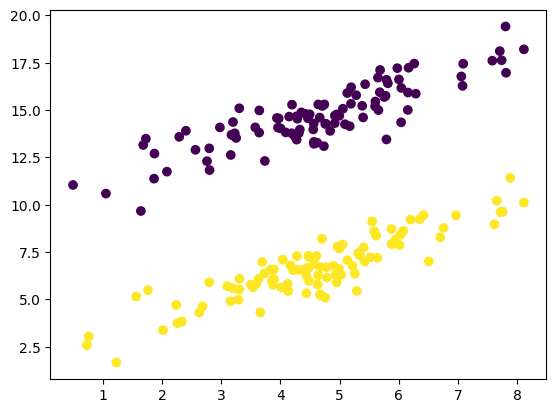

In [62]:
X, y = Get_TwoBlob_data(1)

In [63]:
Nclass = len(set(y))
Nclass

2

# 2. Split data into Training and Testing

In [64]:
from sklearn.model_selection import train_test_split

print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 2018)

(200, 2)
(200,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [65]:
# print(X_train[:20])
print(X_train.shape[1])

2


## Convert scalar class into vector class for NN

In [66]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(X_train.shape)
print(Y_train.shape)

(100, 2)
(100, 2)


# 3. Build ML/DL Model

## Two output neurons

In [67]:
model = Sequential()
N_Features = X_train.shape[1]

model.add(Dense(N_Features, activation = 'relu'))
# model.add(Dense(2, activation = 'softmax'))
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## One output neurons

In [68]:
# model = Sequential()
# N_Features = X_train.shape[1]

# model.add(Dense(N_Features, activation = 'sigmoid'))
# model.add(Dense(4, activation = 'sigmoid'))
# model.add(Dense(1))

# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# 4. Training

In [69]:
start = time.time()
model.fit(X_train, Y_train, epochs = 100)
print('duration =', time.time() - start)

Epoch 1/100


4/4 [==============================] - 0s 1ms/step - loss: 1.3454 - accuracy: 0.5400
Epoch 2/100
4/4 [==============================] - 0s 869us/step - loss: 1.3105 - accuracy: 0.5400
Epoch 3/100
4/4 [==============================] - 0s 913us/step - loss: 1.2757 - accuracy: 0.5400
Epoch 4/100
4/4 [==============================] - 0s 906us/step - loss: 1.2402 - accuracy: 0.5400
Epoch 5/100
4/4 [==============================] - 0s 354us/step - loss: 1.2075 - accuracy: 0.5400
Epoch 6/100
4/4 [==============================] - 0s 503us/step - loss: 1.1751 - accuracy: 0.5400
Epoch 7/100
4/4 [==============================] - 0s 841us/step - loss: 1.1450 - accuracy: 0.5400
Epoch 8/100
4/4 [==============================] - 0s 0s/step - loss: 1.1131 - accuracy: 0.5400
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0836 - accuracy: 0.5400
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0568 - accuracy: 0.5400
Epoch 11/100
4/4 [============

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


# 5. Testing

In [71]:
pred = model.predict(X_test)

4/4 [==============================] - 0s 342us/step


In [72]:
pred[3].sum()

1.0

In [73]:
pred[80].sum()

1.0

In [74]:
pred[:30]

array([[0.7320274 , 0.26797256],
       [0.53452057, 0.4654794 ],
       [0.5686479 , 0.43135205],
       [0.71504164, 0.28495836],
       [0.5162242 , 0.48377585],
       [0.7578289 , 0.24217117],
       [0.74526995, 0.25473005],
       [0.5662519 , 0.43374807],
       [0.7109718 , 0.28902823],
       [0.56017953, 0.43982047],
       [0.70405805, 0.295942  ],
       [0.54736745, 0.4526325 ],
       [0.5713597 , 0.42864037],
       [0.7427532 , 0.2572468 ],
       [0.6743622 , 0.32563782],
       [0.532168  , 0.4678321 ],
       [0.73191094, 0.26808906],
       [0.5049208 , 0.4950793 ],
       [0.79044443, 0.20955561],
       [0.5348609 , 0.46513903],
       [0.5651459 , 0.43485406],
       [0.61003083, 0.38996926],
       [0.74108815, 0.25891185],
       [0.71739304, 0.28260696],
       [0.5041223 , 0.49587774],
       [0.5681574 , 0.4318427 ],
       [0.6691186 , 0.33088142],
       [0.5372732 , 0.4627268 ],
       [0.50695413, 0.4930458 ],
       [0.77546376, 0.22453621]], dtype=flo

# 6. Evaluate the Result

In [75]:
# tmp = np.array([int(x < y) for [x, y] in pred])
# tmp

In [76]:
tmp = np.array([ int(x >= y) for [x, y] in pred])
tmp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
y_test

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [78]:
1 - abs(tmp - y_test).sum() / y_test.shape[0]

0.51

In [ ]:
# plt.plot(X_test, pred)
# plt.plot(X_test, y_test, 'o')